In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
def run_linear_regression(lag, forecast, csv_file):
    # Load and sort data
    df = pd.read_csv(csv_file, parse_dates=['Date'])
    df = df.sort_values('Date').reset_index(drop=True)
    
    # Features to include in lag
    features = ['Open', 'High', 'Low', 'Close', 'Volume']
    
    # Create lag features for each feature column
    for i in range(1, lag + 1):
        for f in features:
            df[f'{f}_lag_{i}'] = df[f].shift(i)
    
    # Target: Close price 'forecast' days ahead
    df['target'] = df['Close'].shift(-forecast)
    
    # Drop rows with NaNs
    df_clean = df.dropna().reset_index(drop=True)
    
    # Prepare X and y
    lag_cols = [f'{f}_lag_{i}' for i in range(1, lag + 1) for f in features]
    X = df_clean[lag_cols].values
    y = df_clean['target'].values
    
    # Split: 70% train, 15% val, 15% test (chronological)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)
    
    # Fit linear regression to training dataset
    model = LinearRegression().fit(X_train, y_train)
    
    # Compute metrics
    metrics = {}
    for split_name, X_split, y_split in [
        ('Train', X_train, y_train),
        ('Validation', X_val, y_val),
        ('Test', X_test, y_test)
    ]:
        y_pred = model.predict(X_split)
        mse = mean_squared_error(y_split, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_split, y_pred)
        r2 = r2_score(y_split, y_pred)
        metrics[f'{split_name}_MSE'] = mse
        metrics[f'{split_name}_RMSE'] = rmse
        metrics[f'{split_name}_MAE'] = mae
        metrics[f'{split_name}_R2'] = r2
    
    return metrics

In [4]:
configs = [
    ('AAPL', 'data/stocks/AAPL.csv'),
    ('SPY', 'data/etfs/SPY.csv')
]
lags_forecasts = [(15, 5), (60, 20), (180, 60)]

In [5]:
results = []
for ticker, path in configs:
    if not os.path.exists(path):
        print(f"Warning: file not found: {path}. Skipping {ticker}.")
        continue
    for lag, forecast in lags_forecasts:
        print(f"Running {ticker} | lag={lag}, forecast={forecast}")
        res = run_linear_regression(lag, forecast, path)
        res.update({'Ticker': ticker, 'Lag': lag, 'Forecast': forecast})
        results.append(res)

Running AAPL | lag=15, forecast=5
Running AAPL | lag=60, forecast=20


C:\Users\middl\AppData\Local\Temp\ipykernel_15328\2899239183.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{f}_lag_{i}'] = df[f].shift(i)
C:\Users\middl\AppData\Local\Temp\ipykernel_15328\2899239183.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{f}_lag_{i}'] = df[f].shift(i)
C:\Users\middl\AppData\Local\Temp\ipykernel_15328\2899239183.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

Running AAPL | lag=180, forecast=60


C:\Users\middl\AppData\Local\Temp\ipykernel_15328\2899239183.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{f}_lag_{i}'] = df[f].shift(i)
C:\Users\middl\AppData\Local\Temp\ipykernel_15328\2899239183.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{f}_lag_{i}'] = df[f].shift(i)
C:\Users\middl\AppData\Local\Temp\ipykernel_15328\2899239183.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

Running SPY | lag=15, forecast=5
Running SPY | lag=60, forecast=20
Running SPY | lag=180, forecast=60


C:\Users\middl\AppData\Local\Temp\ipykernel_15328\2899239183.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{f}_lag_{i}'] = df[f].shift(i)
C:\Users\middl\AppData\Local\Temp\ipykernel_15328\2899239183.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{f}_lag_{i}'] = df[f].shift(i)
C:\Users\middl\AppData\Local\Temp\ipykernel_15328\2899239183.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

,Train_MSE,Train_RMSE,Train_MAE,Train_R2,Validation_MSE,Validation_RMSE,Validation_MAE,Validation_R2,Test_MSE,Test_RMSE,Test_MAE,Test_R2,Ticker,Lag,Forecast,Configuration
0,0.121462,0.348514,0.152006,0.994334,6.826981,2.612849,1.944495,0.988068,49.896780,7.063765,4.742275,0.982377,AAPL,15,5,AAPL_15_5
1,0.316631,0.562700,0.310153,0.986100,56.830847,7.538624,5.550748,0.901151,507.186989,22.520812,16.790123,0.820111,AAPL,60,20,AAPL_60_20
2,0.418956,0.647268,0.460347,0.983836,540.429695,23.247144,16.788874,0.073642,3575.169360,59.792720,48.110408,-0.277681,AAPL,180,60,AAPL_180_60
3,8.372598,2.893544,2.067368,0.991325,13.283421,3.644643,2.800462,0.980717,52.130585,7.220151,4.491682,0.952609,SPY,15,5,SPY_15_5
4,23.653918,4.863529,3.583153,0.974608,40.724583,6.381582,5.085277,0.939182,186.376799,13.651989,8.716144,0.827365,SPY,60,20,SPY_60_20
5,52.026789,7.212960,5.609755,0.937887,117.126013,10.822477,8.988613,0.811305,422.360783,20.551418,16.707128,0.590393,SPY,180,60,SPY_180_60


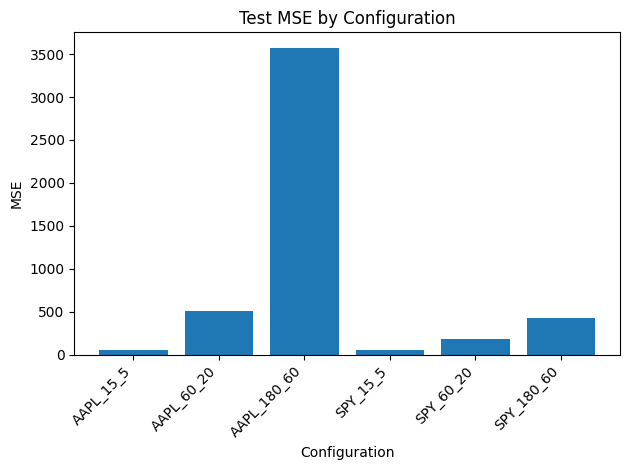

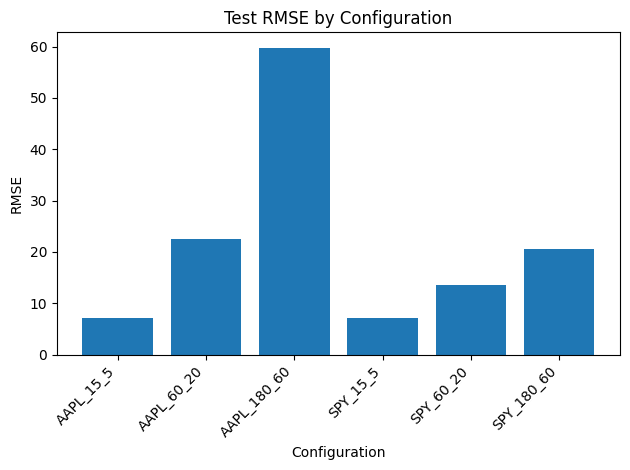

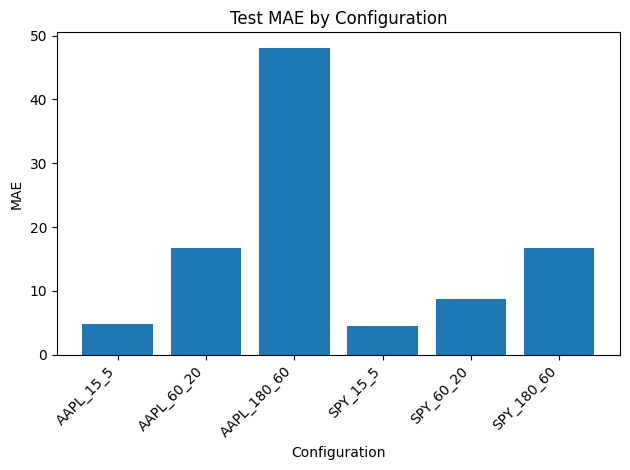

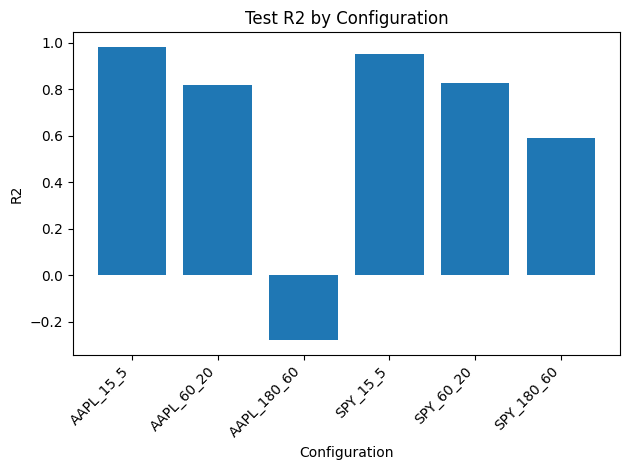

In [7]:
from IPython.display import display

if not results_df.empty:
    # Build the configuration identifier
    results_df['Configuration'] = results_df.apply(
        lambda r: f"{r['Ticker']}_{r['Lag']}_{r['Forecast']}", axis=1
    )
    
    # Render the DataFrame in the notebook
    display(results_df)
    
    # Plot your metrics as before
    metrics = ['MSE', 'RMSE', 'MAE', 'R2']
    for metric in metrics:
        plt.figure()
        plt.bar(results_df['Configuration'], results_df[f'Test_{metric}'])
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Test {metric} by Configuration')
        plt.xlabel('Configuration')
        plt.ylabel(metric)
        plt.tight_layout()
        plt.show()
else:
    print("No results to display. Ensure your CSV files are placed correctly.")